In [6]:
## Specify Locations
from butcherbird.utils.paths import DATA_DIR, ensure_dir
import pathlib2
from butcherbird.utils.paths import DATA_DIR

## specify current
indv = 'Bird26'

SAVE_LOC = DATA_DIR/'interim/coarse_labels/butcherbird_note_df_Bird26.pickle'

In [7]:
## Load in Data

import pandas as pd

indv_df = pd.read_pickle(SAVE_LOC)

indv_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram,umap,hdbscan_labels
0,0,2.530000,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-1.2620183, 8.941696]",20
1,0,2.530000,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.7906025, 13.970144]",10
2,0,2.530000,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.67560273, -12.419799]",4
3,0,2.530000,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1.1711986, 0.554819]",15
4,1,7.660000,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.5493503, -5.213625]",16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1426,7451.938961,7454.270021,2.331060,11,6,7453.230000,7453.347846,0.117846,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 0.00020218813079315542, 0.00039304040322...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.20645718, 1.4278349]",15
10862,1426,7451.938961,7454.270021,2.331060,11,7,7453.430000,7453.582862,0.152862,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -6.027892231941223e-05, -0.000147847971...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.5933441, 1.3531448]",15
10863,1426,7451.938961,7454.270021,2.331060,11,8,7453.582862,7453.644792,0.061930,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.0007704722401279731, -0.002082758701...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[3.7475078, -1.1759353]",17
10864,1426,7451.938961,7454.270021,2.331060,11,9,7453.786119,7453.917918,0.131800,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -2.3817842366836413e-06, -8.17539332897...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-0.059281945, -6.8419547]",5


In [10]:
def construct_rhythm_df(indv_df):
    '''
    This function transforms indv_df for rhythm analyses
    '''
    
    ## Get a list of indv note_strt
    indv_note_strt = indv_df['note_strt']
    
    ### DISCOVER ALL ONSET INTERVALS
    ## Use counter design
    i = 0
    indv_intervals = []
    
    ## for every note onset
    for onset in indv_note_strt:
        
        ## if at last note, exit for loop
        if i == (len(indv_note_strt) - 1):
            continue
            
        ## interval = next onset - current onset, add to interval list
        interval = indv_note_strt[i + 1] - indv_note_strt[i]
        indv_intervals.append(interval)
        
        ## counter up
        i = i + 1
        
    ## Collect intervals into dyadic formation
    
    ## interval 1 does not include last interval
    indv_intervals1 = list(indv_intervals)
    del(indv_intervals1[-1])
    
    ## interval 2 does not include first interval
    indv_intervals2 = list(indv_intervals)
    del(indv_intervals2[0])
    
    ## Put intervals into datafrmae
    d = {'intervals1': indv_intervals1, 'intervals2': indv_intervals2}
    dyadic = pd.DataFrame(data = d)
    
    ## back propagate label and spec information
    
    ## note identity 1
    labels1 = list(indv_df['hdbscan_labels'].values)
    del(labels1[-1])
    del(labels1[-1])
    ## note spec 1
    spec1 = list(indv_df['spectrogram'].values)
    del(spec1[-1])
    del(spec1[-1])
    
    ## note identity 2
    labels2 = list(indv_df['hdbscan_labels'].values)
    del(labels2[0])
    del(labels2[-1])
    ## note spec 2
    spec2 = list(indv_df['spectrogram'].values)
    del(spec2[-1])
    del(spec2[-1])
    
    ## note identity 3
    labels3 = list(indv_df['hdbscan_labels'].values)
    del(labels3[0])
    del(labels3[0])
    ## note spec 3
    spec3 = list(indv_df['spectrogram'].values)
    del(spec3[-1])
    del(spec3[-1])
    
    ## fill
    dyadic['label1'] = labels1
    dyadic['label2'] = labels2
    dyadic['label3'] = labels3
    
    dyadic['spec1'] = spec1
    dyadic['spec2'] = spec2
    dyadic['spec3'] = spec3
    
    ## Sort dyadic into short/long interval
    ### sort all intervals and calculate necessary components
    s_interval = []
    l_interval = []
    cycle_dur = []
    ratio_custom = []
    ratio_roeske = []
    
    ## for every dyadic
    for index, row in dyadic.iterrows():

        i1 = row['intervals1']
        i2 = row['intervals2']

        ## short long decider
        if i1 > i2:
            s = i2
            l = i1
        else:
            s = i1
            l = i2
            
        ## calculate components
        s_interval.append(s)
        l_interval.append(l)
        cycle_dur.append(s + l)
        ratio_roeske.append(i1/(i1+i2))
        ratio_custom.append(s/l)

    ## push into dyadic
    dyadic['s_interval'] = s_interval
    dyadic['l_interval'] = l_interval
    dyadic['cycle_dur'] = cycle_dur
    dyadic['ratio_roeske'] = ratio_roeske
    dyadic['ratio_custom'] = ratio_custom
    
    ## sort ascending by shortest cycle to longest cycle
    dyadic = dyadic.sort_values(by = ['cycle_dur'])
    
    ## filter out transition between phrases
    dyadic = dyadic[dyadic['l_interval'] < 1]
    dyadic = dyadic[dyadic['s_interval'] > 0]
    
    ## put cycle rank into data frame
    dyadic['cycle_rank'] = dyadic['cycle_dur'].rank().astype(int)
    
    return dyadic

In [11]:
dyadic = construct_rhythm_df(indv_df)

In [15]:
dyadic

,intervals1,intervals2,label1,label2,label3,spec1,spec2,spec3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
1897,0.036661,0.018330,20,11,10,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.018330,0.036661,0.054991,0.666667,0.500000,1
4525,0.045403,0.011351,20,10,10,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.011351,0.045403,0.056753,0.800000,0.250000,2
246,0.036661,0.020622,20,20,10,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.020622,0.036661,0.057282,0.640000,0.562500,3
4125,0.039727,0.024593,20,20,10,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.024593,0.039727,0.064321,0.617647,0.619048,4
3490,0.049186,0.018837,13,11,7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.018837,0.049186,0.068024,0.723078,0.382977,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6068,0.424074,0.665907,17,16,9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.424074,0.665907,1.089982,0.389066,0.636837,8009
8981,0.849679,0.266775,10,16,16,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.266775,0.849679,1.116454,0.761051,0.313972,8010
6945,0.600683,0.540571,17,5,15,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.540571,0.600683,1.141254,0.526336,0.899927,8011
1127,0.710000,0.437014,1,16,16,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.437014,0.710000,1.147014,0.618999,0.615512,8012


In [12]:
import seaborn as sns

<AxesSubplot:xlabel='ratio_roeske', ylabel='Count'>

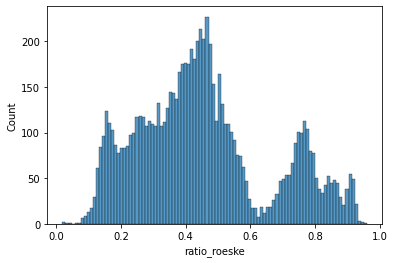

In [21]:
sns.histplot(dyadic['ratio_roeske'], bins = 100)